<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

<a id="section7"></a>
### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [1]:
# importing important libraries
import os

import numpy as np
import pandas as pd
from scipy import optimize

# for plotting purpose
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
# extracting data into numpy
data = pd.read_csv(filepath_or_buffer="Data/ex1data1.txt", delimiter=',', header=None)
data = data.to_numpy(dtype=float)
X, y = data[:,:-1], data[:,-1]

In [3]:
# Plotting the Data
def plotData(X, y):
    fig = pyplot.figure() # open a new figure
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

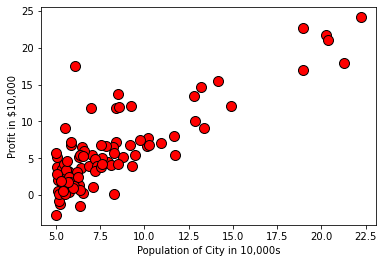

In [4]:
plotData(X, y)

In [5]:
def costFunction(theta, X, y):
    m = y.shape[0]
    
    expected_values = X@theta
    
    # J is the cost and grad is the gradien
    
    J = np.sum(np.square(expected_values - y))/(2*m)
    grad = ((expected_values - y)@X)/m
    
    return J, grad


In [6]:
def featureNormalize(X):
    
    X_norm = X.copy()
    
    mu = np.mean(X_norm, axis=0)
    X_norm = X_norm - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

In [7]:
def gradientDescent(X, y, theta, alpha, num_itr):
    theta = theta.copy()
    m = y.shape[0]
    J_history = []
    
    for i in range(num_itr):
        J, grad = costFunction(theta, X, y)
        
        theta = theta - alpha*grad
        
        J_history.append(J)
        
    return theta, J_history

In [8]:
######## METHOD 1: USING OPTIMIZE FUNCTION #################

X, y = data[:,:-1], data[:,-1]

# Add 1s column to X
X = np.hstack((np.ones((y.shape[0], 1)), X))

initial_theta = np.ones(X.shape[1])

options = {'maxiter': 400}
res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True, method='TNC', options=options)

res.x, res.fun

(array([-3.89578095,  1.19303365]), 4.476971375975179)

In [9]:
############## METHOD 2: USING GRADIENT DESCENT ###############
X, y = data[:,:-1], data[:,-1]

# Normalizing X
X_norm, mu, sigma = featureNormalize(X)

# Adding 1s column to dataset
X_norm = np.hstack((np.ones((y.shape[0], 1)), X_norm))


theta, J_history = gradientDescent(X_norm, y, np.zeros(X_norm.shape[1]), 1.2, 150)
print(theta, J_history[-1])

[5.83913505 4.59304113] 4.476971375975179


In [10]:
############# METHOD 3: USING NORMALIZATION ################

X, y = data[:, :-1], data[:, -1]

# Adding 1s column
X = np.hstack((np.ones((y.shape[0], 1)), X))


theta = np.linalg.inv(X.T@X)@(X.T@y)
print(theta, costFunction(theta, X, y))

[-3.89578088  1.19303364] (4.476971375975178, array([-1.79924804e-14, -7.67663628e-14]))


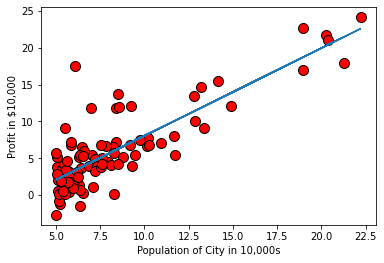

In [11]:
# Remeber X has a extra 1s coloum...
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], X@theta, '-')
pass

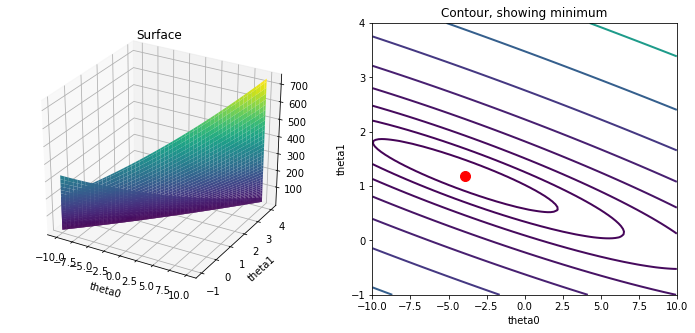

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = costFunction([theta0, theta1], X, y)[0]
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass